In [22]:

#D.help()
#S.help()

##D = SandpileDivisor(S,randomlist)
from scipy import signal
signal.unit_impulse(10,2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

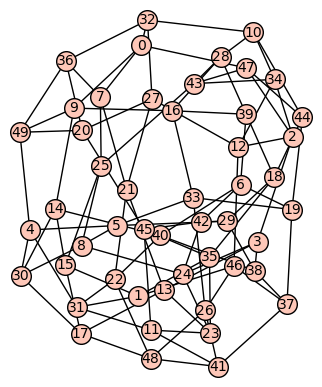

[[ 4 44 11 ...  3 44 11]
 [46  4 35 ... 46 23 35]
 [11 26  4 ...  3 50 48]
 ...
 [ 3 47  3 ...  4 47 30]
 [47 21 47 ... 47  4 42]
 [11 33 48 ... 21 48  4]]
[67215]


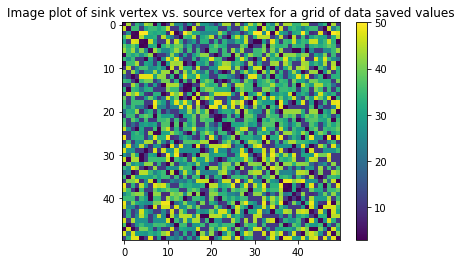

In [38]:
from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Abilene.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
i = 0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
pop=0
corrList =[]
while pop < 1:
    g = graphs.RandomRegular(4,50)
    dictf = g
#g = dictf
    i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
    l = []#empty list
    b=[]#empty list
    while i > -1:
        S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
        j=0 
        f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
        d = []#empty list to build l, our internal matrix
        n=[]#empty list to build b, our external matrix
        c = S.max_stable() #nice value to have
        while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
            config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
            intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
            one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
            p = c + one #creates the overflowed sandpile by one grain
            o = p.stabilize() # creates the stabilized sandpile
            x=0 # initialize x
            while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
            q = int(sum(list(c.values()))-sum(o.values())) # sets the value of how much data is saved 
            d.append(q) #add q to the list d
            j+=1# counter
        e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
        cValues = list(c.values()) #creates a list of the max values 
        cValues.insert(i,e[i])# adds the sink to the cvalues
        D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
        D = D.fire_unstable() #fires as if a sandpile
        D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
        afterTwoRounds = D.values() # takes the values of D into a list
        afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
        E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
        x =2 #inititalize, has to be 2 because 2 rounds have went by
        while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
                x+=1
                E = E.fire_unstable()
        T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
        n.insert(i, T)# puts the sink as source into the list n
        d.insert(i, sum(cValues)-sum(list(c.values())))#adds the diagnol in 
        b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
        l.insert(0,d) #adds the list d to l to create the internal matrix
        i-=1
    A=np.array(l)
    B=np.array(b)
    B = B.max()-B
    totalSum = sum(np.sum(A, axis = 1))#+sum(np.sum(B, axis = 1))
    if totalSum not in corrList:
        corrList.append(totalSum)
    pop+=1
S = Sandpile(dictf,1)
S.show()
#print(l)
#print(b)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
#A = (A - Amin)/(Amax - Amin) #normalizes values
#print('Trace of normalized values= ' + str(np.trace(A)))
#print('Determinant= ' + str(np.linalg.det(A)))
#print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
#print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 

#how much is lost internally
#eigvals, eigvecs = LA.eig(A)
#print("Eigenvalues= ", eigvals)
#print("Eigenvectors= ", eigvecs)
#print("Inverse= ", np.linalg.inv(A))

#External influx rejection
B=np.array(b)
B = B.max()-B
Bmax, Bmin = B.max(), B.min()
#B = (B - Bmin)/(Bmax - Bmin) #normalizes values
new = {}
i=0
while i < len(dictf):
    new.update({i: list(dictf[i])})
    i+=1
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
g = Graph(new)
newdata =g.distance_matrix()
adja = g.adjacency_matrix()
E = np.array(adja)
#A internal, B external,C = A+B D distance, E adjacency
D = np.array(newdata)
Dmax, Dmin = D.max(), D.min()
D = (D - Dmin)/(Dmax - Dmin)
Emax, Emin = E.max(), E.min()
E = (E - Emin)/(Emax - Emin)
I = A+B-2*D
Imax, Imin = I.max(), I.min()
I = (I - Imin)/(Imax - Imin)
plt.imshow(A);plt.colorbar()
print(A)
cycle = I
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
#WORK TO GET IT TO WORK WITH ALL DICT, idk why it doesnt work rn
print(corrList)

In [44]:
from scipy import signal
i=0
l = []
while i < len(dict):
    S= Sandpile(g, i)
    c = S.maxstable()
    j=0
    f = len(S.nonsinkvertices())
    d = []
    while j < f:
        one = SandpileConfig(S, signal.unit_impulse(f,j).tolist())
        p = c + one
        ~p
        q = int(sum(p.values()))
        d.append(q)#add q to the list d
        j+=1
    l.insert(d,0)
    i+=1

SyntaxError:  (<string>)

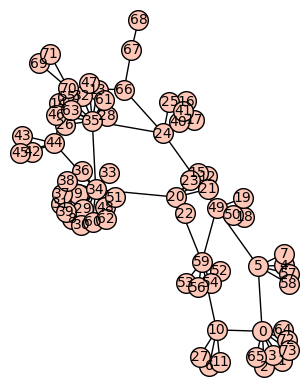

Trace of normalized values= 70.0
Determinant= 1.0827055759947065e-100
Sum of matrix(rows)=  [59.56410256 59.56410256 59.56410256 59.56410256 59.20512821 59.20512821
 59.1025641  59.20512821 62.12820513 62.12820513 59.1025641  59.1025641
 61.35897436 60.64102564 60.64102564 61.35897436 62.12820513 62.12820513
 61.25641026 61.25641026 61.35897436 61.35897436 61.35897436 61.35897436
 62.12820513 62.12820513 60.64102564 59.1025641  60.64102564 62.12820513
 62.12820513 62.12820513 60.64102564 62.12820513 62.12820513 60.64102564
 62.12820513 62.12820513 62.12820513 62.12820513 62.12820513 62.12820513
 60.17948718 60.17948718 60.17948718 60.17948718 60.64102564 60.64102564
 62.12820513 61.25641026 61.25641026 62.12820513 60.79487179 60.79487179
 60.79487179 60.64102564 60.79487179 59.20512821 59.20512821 60.79487179
 62.12820513 60.64102564 62.12820513 60.64102564 59.56410256 59.56410256
 60.38461538 60.38461538 60.38461538 60.28205128 60.28205128 60.28205128
 59.56410256 59.56410256]
Sum of 

AttributeError: 'dict' object has no attribute 'spectrum'

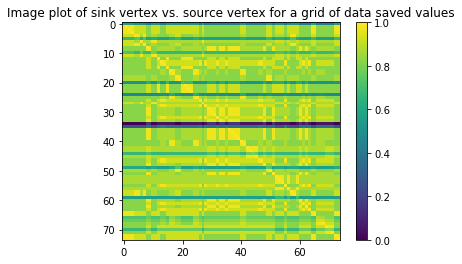

In [154]:
import networkx as nx

g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Sinet.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
i = 0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
from scipy import signal
i=len(dictf)-1
l = []
while i > -1:
    S= Sandpile(dictf, int(i))
    j=0
    f = len(S.nonsink_vertices())
    d = []
    c = S.max_stable()
    while j < f:
        config = signal.unit_impulse(f,j).tolist()
        intConfig = [int(x) for x in config]
        one = SandpileConfig(S, intConfig)
        p = c + one
        o = p.stabilize()
        q = int(sum(o.values()))
        d.append(q) #add q to the list d
        j+=1
    d.insert(i,sum(c.values()))
    l.insert(0,d)
    i-=1
S = Sandpile(dictf,1)
S.show()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin) #normalizes values
print('Trace of normalized values= ' + str(np.trace(A)))
print('Determinant= ' + str(np.linalg.det(A)))
print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 


plt.imshow(A); plt.colorbar()
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")

eigvals, eigvecs = LA.eig(A)
print("Eigenvalues= ", eigvals)
print("Eigenvectors= ", eigvecs)
print("Inverse= ", np.linalg.inv(A))
print(dictf.spectrum())
print(dictf.eigenvectors())
print(dictf.eigenspace())

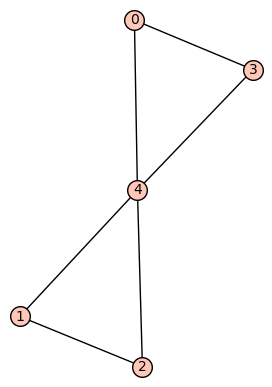

[[6, 4, 4, 5, 5], [4, 6, 5, 4, 5], [4, 5, 6, 4, 5], [5, 4, 4, 6, 5], [3, 3, 3, 3, 4]]
Trace of normalized values= 4.333333333333333
Determinant= 0.08641975308641973
Sum of matrix(rows)=  [2.33333333 2.33333333 2.33333333 2.33333333 3.        ]
Sum of matrix(columns)=  [3.         3.         3.         3.         0.33333333]
Eigenvalues=  [2.33333333 0.33333333 1.         0.33333333 0.33333333]
Eigenvectors=  [[-5.00000000e-01 -7.07106781e-01  5.00000000e-01 -6.31543548e-01
  -7.43525537e-01]
 [-5.00000000e-01 -9.41087486e-17 -5.00000000e-01 -3.18045197e-01
  -2.31113650e-01]
 [-5.00000000e-01  1.20996962e-16 -5.00000000e-01  3.18045197e-01
   5.27157194e-02]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01  6.31543548e-01
   5.65127607e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.67596895e-01]]
Inverse=  [[ 1.85714286 -0.14285714 -0.14285714 -1.14285714 -0.85714286]
 [-0.14285714  1.85714286 -1.14285714 -0.14285714 -0.85714286]
 [-0.14285714 -1.14285714 

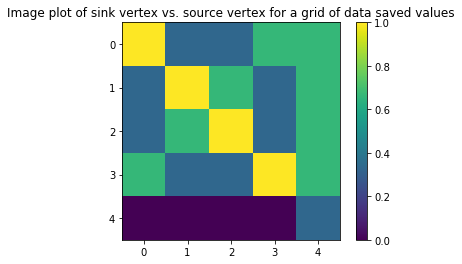

In [2]:
from scipy import signal
g = graphs.HouseGraph()
i=len(g)-1
l = []
while i > -1:
    S= Sandpile(g, int(i))
    j=0
    f = len(S.nonsink_vertices())
    d = []
    c = S.max_stable()
    while j < f:
        config = signal.unit_impulse(f,j).tolist()
        intConfig = [int(x) for x in config]
        one = SandpileConfig(S, intConfig)
        p = c + one
        o = p.stabilize()
        q = int(sum(o.values()))
        d.append(q) #add q to the list d
        j+=1
    d.insert(i,sum(c.values()))#adds the diagnol in 
    l.insert(0,d)
    i-=1
S = Sandpile(g,1)
S.show()
print(l)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin) #normalizes values
print('Trace of normalized values= ' + str(np.trace(A)))
print('Determinant= ' + str(np.linalg.det(A)))
print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 


plt.imshow(A); plt.colorbar()
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
eigvals, eigvecs = LA.eig(A)
print("Eigenvalues= ", eigvals)
print("Eigenvectors= ", eigvecs)
print("Inverse= ", np.linalg.inv(A))

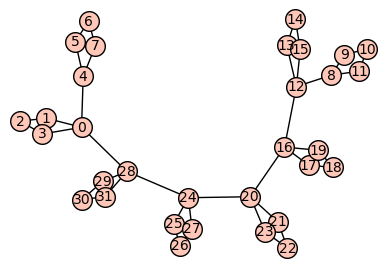

In [236]:
g = {
 0: [1,28,3,4],
 1: [0, 2],
 2: [1, 3],
 3: [ 2,0],
 4: [ 5,7,0],
 5: [4, 6],
 6: [5, 7],
 7: [6,4],
 8: [9,11,12],
 9: [8, 10],
 10: [9, 11],
 11: [10, 8],
 12: [13,15,16,8],
 13: [12, 14],
 14: [13, 15],
 15: [14,12],
 16: [17,19,20,12],
 17: [16, 18],
 18: [17, 19],
 19: [18, 16],
 20: [16, 21,23,24],
 21: [20, 22],
 22: [21, 23],
 23: [22, 20],
 24: [25,20,28,27],
 25: [24, 26],
 26: [25, 27],
 27: [26, 24],
 28: [29,24,0,31],
 29: [28, 30],
 30: [29, 31],
 31: [30,28]
 }
S = Sandpile(g, 1)
S.show()

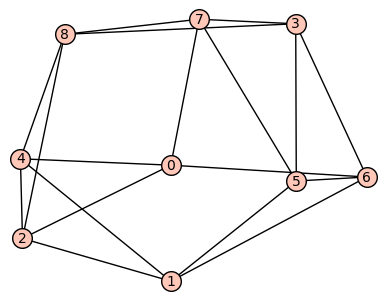

[[4 9 3 9 3 9 3 3 9]
 [7 4 3 7 3 3 3 7 7]
 [3 3 4 7 3 7 7 7 3]
 [7 7 7 4 7 3 3 3 3]
 [3 3 3 7 4 7 7 7 3]
 [7 3 7 3 7 4 3 3 7]
 [3 3 8 3 8 3 4 8 8]
 [3 8 8 3 8 3 8 4 3]
 [7 7 3 3 3 7 7 3 4]]
[412]


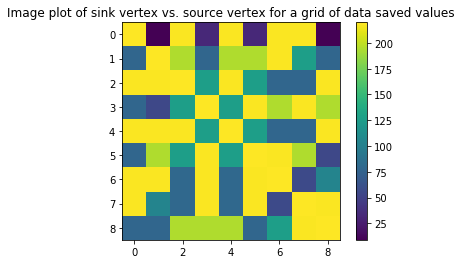

In [23]:
from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Abilene.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
i = 0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
pop=0
corrList =[]
while pop < 1:
    g = graphs.RandomRegular(4,9)
    dictf = g
#g = dictf
    i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
    l = []#empty list
    b=[]#empty list
    while i > -1:
        S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
        j=0 
        f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
        d = []#empty list to build l, our internal matrix
        n=[]#empty list to build b, our external matrix
        c = S.max_stable() #nice value to have
        while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
            config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
            intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
            one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
            p = c + one #creates the overflowed sandpile by one grain
            o = p.stabilize() # creates the stabilized sandpile
            x=0 # initialize x
            while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
            q = int(sum(list(c.values()))-sum(o.values())) # sets the value of how much data is saved 
            d.append(q) #add q to the list d
            j+=1# counter
        e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
        cValues = list(c.values()) #creates a list of the max values 
        cValues.insert(i,e[i])# adds the sink to the cvalues
        D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
        D = D.fire_unstable() #fires as if a sandpile
        D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
        afterTwoRounds = D.values() # takes the values of D into a list
        afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
        E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
        x =2 #inititalize, has to be 2 because 2 rounds have went by
        while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
                x+=1
                E = E.fire_unstable()
        T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
        n.insert(i, T)# puts the sink as source into the list n
        d.insert(i, sum(cValues)-sum(list(c.values())))#adds the diagnol in 
        b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
        l.insert(0,d) #adds the list d to l to create the internal matrix
        i-=1
    A=np.array(l)
    B=np.array(b)
    B = B.max()-B
    totalSum = sum(np.sum(A, axis = 1))#+sum(np.sum(B, axis = 1))
    if totalSum not in corrList:
        corrList.append(totalSum)
    pop+=1
S = Sandpile(dictf,1)
S.show()
#print(l)
#print(b)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
#A = (A - Amin)/(Amax - Amin) #normalizes values
#print('Trace of normalized values= ' + str(np.trace(A)))
#print('Determinant= ' + str(np.linalg.det(A)))
#print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
#print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 

#how much is lost internally
#eigvals, eigvecs = LA.eig(A)
#print("Eigenvalues= ", eigvals)
#print("Eigenvectors= ", eigvecs)
#print("Inverse= ", np.linalg.inv(A))

#External influx rejection
B=np.array(b)
B = B.max()-B
Bmax, Bmin = B.max(), B.min()
#B = (B - Bmin)/(Bmax - Bmin) #normalizes values
new = {}
i=0
while i < len(dictf):
    new.update({i: list(dictf[i])})
    i+=1
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
g = Graph(new)
newdata =g.distance_matrix()
adja = g.adjacency_matrix()
E = np.array(adja)
#A internal, B external,C = A+B D distance, E adjacency
D = np.array(newdata)
Dmax, Dmin = D.max(), D.min()
D = (D - Dmin)/(Dmax - Dmin)
Emax, Emin = E.max(), E.min()
E = (E - Emin)/(Emax - Emin)
I = A+B-2*D
Imax, Imin = I.max(), I.min()
I = (I - Imin)/(Imax - Imin)
plt.imshow(A+B);plt.colorbar()
print(A)
cycle = I
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
#WORK TO GET IT TO WORK WITH ALL DICT, idk why it doesnt work rn
print(corrList)

In [669]:
g = {
 0: [1,31,3],
 1: [0, 2],
 2: [1, 3],
 3: [0, 4, 2],
 4: [3, 5,7],
 5: [4, 6],
 6: [5, 7],
 7: [6, 8,4],
 8: [7, 9,11],
 9: [8, 10],
 10: [9, 11],
 11: [10, 12, 8],
 12: [11, 13,15],
 13: [12, 14],
 14: [13, 15],
 15: [16, 14,12],
 16: [17,15,19],
 17: [16, 18],
 18: [17, 19],
 19: [18, 20,16],
 20: [19, 21,23],
 21: [20, 22],
 22: [21, 23],
 23: [22, 24,20],
 24: [23, 25,27],
 25: [24, 26],
 26: [25, 27],
 27: [26, 28,24],
 28: [27, 29,31],
 29: [28, 30],
 30: [29, 31],
 31: [30,28,0]
 }
g = Graph({
 0: [1,28,3,4],
 1: [0, 2],
 2: [1, 3],
 3: [ 2,0],
 4: [ 5,7,8,0],
 5: [4, 6],
 6: [5, 7],
 7: [6,4],
 8: [9,11,12,4],
 9: [8, 10],
 10: [9, 11],
 11: [10, 8],
 12: [13,15,16,8],
 13: [12, 14],
 14: [13, 15],
 15: [14,12],
 16: [17,19,20,12],
 17: [16, 18],
 18: [17, 19],
 19: [18, 16],
 20: [16, 21,23,24],
 21: [20, 22],
 22: [21, 23],
 23: [22, 20],
 24: [25,20,28,27],
 25: [24, 26],
 26: [25, 27],
 27: [26, 24],
 28: [29,24,0,31],
 29: [28, 30],
 30: [29, 31],
 31: [30,28]
 })


In [103]:
from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Abilene.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
g = Graph(dictf)
from sage.graphs.graph_coloring import numbers_of_colorings
print(numbers_of_colorings(g))
new = {}
i=0
while i < len(dictf):
    new.update({i: list(dictf[i])})
    i+=1
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
g = Graph(new)
newdata =g.distance_matrix()
A = np.array(newdata)
S = Sandpile(dictf,0)
S.show()
Amin, Amax = A.max(), A.min()
A = (A - Amin)/(Amax - Amin)
plt.imshow(A); plt.colorbar()
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
#WORK TO GET IT TO WORK WITH ALL DICT, idk why it doesnt work rn

KeyboardInterrupt: 

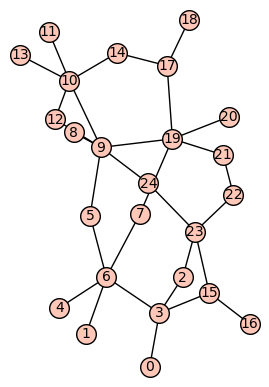

[[1.         0.7826087  0.7826087  0.95652174 0.7826087  0.69565217
  0.7826087  0.69565217 0.69565217 0.69565217 0.69565217 0.69565217
  0.69565217 0.69565217 0.69565217 0.7826087  0.7826087  0.69565217
  0.69565217 0.69565217 0.69565217 0.69565217 0.69565217 0.69565217
  0.69565217]
 [0.7826087  1.         0.69565217 0.7826087  0.95652174 0.7826087
  0.95652174 0.7826087  0.69565217 0.69565217 0.52173913 0.52173913
  0.52173913 0.52173913 0.52173913 0.69565217 0.69565217 0.52173913
  0.52173913 0.69565217 0.69565217 0.69565217 0.69565217 0.69565217
  0.69565217]
 [0.7826087  0.60869565 0.91304348 0.7826087  0.60869565 0.60869565
  0.60869565 0.43478261 0.60869565 0.60869565 0.34782609 0.34782609
  0.34782609 0.34782609 0.34782609 0.7826087  0.7826087  0.34782609
  0.34782609 0.43478261 0.43478261 0.60869565 0.60869565 0.7826087
  0.60869565]
 [0.69565217 0.52173913 0.52173913 0.73913043 0.52173913 0.43478261
  0.52173913 0.43478261 0.43478261 0.43478261 0.43478261 0.43478261
  0.4347

Text(0.5,1,'Image plot of sink vertex vs. source vertex for a grid of data saved values')

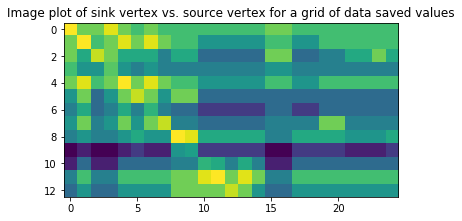

In [4]:

from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Agis.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
i = 0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
g = graphs.RandomRegular(4,13)
#dictf = g
i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
while i > -1:
    S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0 
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        x=0 # initialize x
        while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
            x+=1 #counter
            p = p.fire_unstable() # stabilzer
        n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
S = Sandpile(dictf,1)
S.show()
#print(l)
#print(b)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin) #normalizes values
#print('Trace of normalized values= ' + str(np.trace(A)))
#print('Determinant= ' + str(np.linalg.det(A)))
#print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
#print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 

#how much is lost internally
plt.imshow(A); 
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
#eigvals, eigvecs = LA.eig(A)
#print("Eigenvalues= ", eigvals)
#print("Eigenvectors= ", eigvecs)
#print("Inverse= ", np.linalg.inv(A))

#External influx rejection
B=np.array(b)
Bmin, Bmax = B.max(), B.min()
B = (B - Bmin)/(Bmax - Bmin) #normalizes values
print(A)
plt.imshow(A); 
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
from scipy import signal
from sage.graphs.distances_all_pairs import shortest_path_all_pairs
from sage.graphs.distances_all_pairs import distances_all_pairs
import networkx as nx
from sage.groups.perm_gps.permgroup_named import SymmetricGroup
pop=0
corrList = []
secList = []
someUseList = []
threeDListforDist=[]
pathedListIDKWHATIMDOINGHELP=[]
G = graphs.RandomRegular(4,11)
while pop < 5:
    g = graphs.RandomRegular(5,10)
    dictf = g
#g = dictf
    i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
    l = []#empty list
    b=[]#empty list
    while i > -1:
        S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
        j=0 
        f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
        d = []#empty list to build l, our internal matrix
        n=[]#empty list to build b, our external matrix
        c = S.max_stable() #nice value to have
        while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
            config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
            intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
            one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
            p = c + one #creates the overflowed sandpile by one grain
            o = p.stabilize() # creates the stabilized sandpile
            x=0 # initialize x
            while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
            q = int(sum(o.values())) # sets the value of how much data is saved 
            d.append(q) #add q to the list d
            j+=1# counter
        e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
        cValues = list(c.values()) #creates a list of the max values 
        cValues.insert(i,e[i])# adds the sink to the cvalues
        D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
        D = D.fire_unstable() #fires as if a sandpile
        D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
        afterTwoRounds = D.values() # takes the values of D into a list
        afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
        E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
        x =2 #inititalize, has to be 2 because 2 rounds have went by
        while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
                x+=1
                E = E.fire_unstable()
        T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
        n.insert(i, T)# puts the sink as source into the list n
        d.insert(i, sum(list(c.values())))#adds the diagnol in 
        b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
        l.insert(0,d) #adds the list d to l to create the internal matrix
        i-=1
    A=np.array(l)
    B=np.array(b)
    B = B.max()-B
    totalSum = sum(np.sum(A, axis = 1))#+sum(np.sum(B, axis = 1))
    secThing = list(distances_all_pairs(g).values())
    K=0
    nwThing = []
    while K<len(secThing):
        kool = []
        O= 0
        while O <  len(secThing):
            if secThing[K][O] == "None":
                kool.append(-1)
            else:
                kool.append(secThing[K][O])
            O+=1
        nwThing.insert(K,kool)
        K+=1
    threeDListforDist.append(nwThing)
    if totalSum not in corrList:
        corrList.append(totalSum)
    pop+=1
    Q = np.array(nwThing)
    K=0
    Paths=[]
    while K<len(secThing):
        kool = []
        O= 0
        while O <  len(secThing):
                kool.append(len(list(g.shortest_simple_paths(K,O))))
                O+=1
        Paths.insert(K,kool)
        K+=1
    pathedListIDKWHATIMDOINGHELP.append(Paths)
    pathednP = np.array(Paths)
    Q=0
    holla =[]
    while Q <g.order():
        U=0 
        rowed = []
        while U<g.order():
            if Q == U:
                rowed.append(0)
            else:
                rowed.append(g.edge_cut(U,Q))
            U+=1
        Q+=1
        holla.append(rowed)
    minCut = np.array(holla)
    #print(np.array(g.kirchhoff_matrix()))
    eigvals, eigvecs = LA.eig(minCut)
    S= Sandpile(dictf, 0)
    LapLap =S.laplacian()
    LapAr = np.array(LapLap)
    eigvals, eigvecs = LA.eig(LapAr)
    EigVecAr = np.array(eigvecs)
    tuptup = list(np.ravel(EigVecAr*10000))#,sum(np.sum(pathednP, axis = 0)),sum(np.sum(Q, axis = 0)),Q.max(),np.linalg.det(pathednP),np.linalg.det(Q),G.is_isomorphic(g),]
    #if tuptup not in someUseList:
    tuptup.insert(0,totalSum)
    someUseList.append(tuptup)
    G = g
    print(np.array(Paths))
    print(np.array(l))
corrList = sorted(corrList)
#someUseList = sorted(someUseList)
numberSimple = np.array(pathedListIDKWHATIMDOINGHELP)
distances= np.array(threeDListforDist)
causeIlikeArrays = np.array(someUseList)
I=0

#print(numberSimple)
#print(distances)
#np.savetxt('2darray.csv', causeIlikeArrays, delimiter=',', fmt='%d')
#a = open("2darray.csv", 'r')
#print(a.read()) 

[[   1 1095 1061 1159 1095 1067 1181 1095 1159 1159]
 [1095    1 1099 1147 1066 1095 1094 1066 1168 1147]
 [1061 1099    1 1236 1099 1061 1214 1099 1236 1236]
 [1159 1147 1236    1 1147 1159 1063 1168 1060 1060]
 [1095 1066 1099 1147    1 1095 1094 1066 1147 1168]
 [1067 1095 1061 1159 1095    1 1181 1095 1159 1159]
 [1181 1094 1214 1063 1094 1181    1 1094 1063 1063]
 [1095 1066 1099 1168 1066 1095 1094    1 1147 1147]
 [1159 1168 1236 1060 1147 1159 1063 1147    1 1060]
 [1159 1147 1236 1060 1168 1159 1063 1147 1060    1]]
[[36 32 32 22 32 32 32 32 22 22]
 [32 36 32 32 22 32 22 22 22 32]
 [32 32 36 27 32 32 27 32 27 27]
 [25 32 25 36 32 25 32 25 32 32]
 [32 22 32 32 36 32 22 22 32 22]
 [32 32 32 22 32 36 32 32 22 22]
 [32 25 25 32 25 32 36 25 32 32]
 [32 22 32 22 22 32 22 36 32 32]
 [25 25 25 32 32 25 32 32 36 32]
 [25 32 25 32 25 25 32 32 32 36]]
[[   1 1149 1071 1159 1144 1029 1124 1092 1067 1106]
 [1149    1 1106 1057 1062 1108 1062 1100 1118 1085]
 [1071 1106    1 1144 1159 1067 

KeyboardInterrupt: 

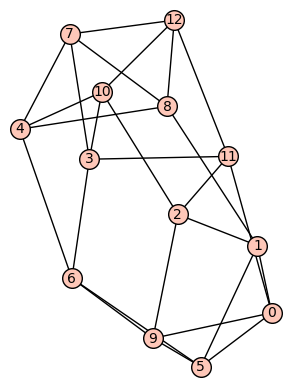

[1, 1, 3, 7, 1, 3, 9, 3, 1, 11, 9, 1, 4, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 9, 3, 1, 11, 9, 2, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 9, 3, 1, 11, 10, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 9, 3, 1, 12, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 9, 3, 2, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 9, 4, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 3, 10, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 1, 4, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 7, 2, 3, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 3, 8, 1, 3, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 1, 4, 7, 1, 3, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[1, 2, 3, 7, 1, 3, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 3]
[2, 1, 3, 7, 1, 3, 9, 3, 1, 11, 9, 1, 3, 1, 3, 5, 1, 5, 1, 9, 1, 3, 3, 7, 

Text(0.5,1,'Image plot of sink vertex vs. source vertex for a grid of data saved values')

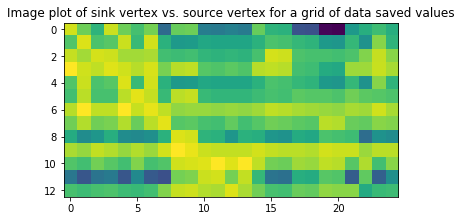

In [3]:
from scipy import signal
import networkx as nx
from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Agis.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()
j = nx.to_dict_of_dicts(g)
valuesForCities = list(enumerate(list(j)))#this is the indexing for the cities, so chicago is 0, NY 1, etc.
connections = list(g.edges()) # these are the connections in the graph, so NY to Chicago, etc. 
i=0
dictf= {}
connectionTupToList = list(sum(connections, ())) #makes list of tuples to list for the connections of the cities
l = []# change variable name! Remember to change it everywhere Monroe...

while i < len(valuesForCities):
    j=0
    while j < 2:
        l.append(valuesForCities[i][j])#takes from list of tuples to a list, cause tuples cant have ints for the cities and their indexes
        j+=1
    i+=1
i=0
connectionsIndex = []#list where we will assign the connections their respective index, so from previous, NY to Chicgo would be 0, 1
while i < len(connectionTupToList):
    j = 0
    while j < len(l):
        if connectionTupToList[i] == l[j]:
            connectionsIndex.append(l[j-1])
        j+=1
    i+=1
connectionsIndexReverse = connectionsIndex[::-1]# since undirected graph we need both ways, so this reverses the order so now chicago to ny is in with 1, 0 
i=0
updateCI=[]
while i<len(connectionsIndex):
  updateCI.append(connectionsIndex[i:i+2])
  i+=2
i=0
updateCIR=[]
while i<len(connectionsIndexReverse):
  updateCIR.append(connectionsIndexReverse[i:i+2])
  i+=2
i=0
i = 0
while i<len(l)/2:
    tempDict={}
    j=0
    while j < len(updateCI):
        if updateCI[j][0] ==  i:
            tempDict.update({updateCI[j][1]:2})
        if updateCIR[j][0] ==  i:
            tempDict.update({updateCIR[j][1]:2})
        j+=1
    dictf[i] = tempDict
    i+=1
g = dictf
gg=nx.Graph(dictf)
g= graphs.RandomRegular(4,13)
#gg= g.networkx_graph() if you enable these two commands, make sure to replace 4 by 2 in OD

i=len(g)-1
l = []
b=[]
OD= (4*nx.number_of_edges(gg))-nx.number_of_nodes(gg) #influx per round
while i > -1:
    S= Sandpile(g, int(i))
    j=0
    f = len(S.nonsink_vertices())
    d = []
    n= []
    c = S.max_stable()
    while j < f:
        intConfig = [int(x) for x in signal.unit_impulse(f,j).tolist()]
        p = c + SandpileConfig(S, intConfig)
        o = p.stabilize()
        x=0
        while p.is_stable()==false:
            x+=1
            p = p.fire_unstable()
        n.append(x*OD)
        d.append(int(sum(o.values()))) #add o.values to the list d
        j+=1
    e= list(S.out_degree().values())
    cValues = list(c.values())
    cValues.insert(i,e[i])
    D = SandpileDivisor(S, cValues)
    D = D.fire_unstable()
    D = D.fire_unstable()
    afterTwoRounds = D.values()
    afterTwoRounds.pop(i)
    E = SandpileConfig(S,afterTwoRounds)
    x =0 
    while E.is_stable()==false:
            x+=1
            E = E.fire_unstable()
    T = (x*OD)
    n.insert(i, T)
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n)
    l.insert(0,d)
    i-=1
S = Sandpile(g,1)
S.show()
i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
while i > -1:
    S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0 
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        x=0 # initialize x
        TT = 0
        while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
            if TT<1:
                p = p+one+one
            x+=1 #counter
            p = p.fire_unstable() # stabilzer
            TT+=1
        n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    print(cValues)
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(cValues)-sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
#print(l)
#print(b)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin) #normalizes values
#print('Trace of normalized values= ' + str(np.trace(A)))
#print('Determinant= ' + str(np.linalg.det(A)))
#print("Sum of matrix(rows)= ", np.sum(A, axis = 0))  
#print("Sum of matrix(columns)= ", np.sum(A, axis = 1)) 

#how much is lost internally
plt.imshow(A); 
print(A)
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
#eigvals, eigvecs = LA.eig(A)
#print("Eigenvalues= ", eigvals)
#print("Eigenvectors= ", eigvecs)
#print("Inverse= ", np.linalg.inv(A))

#External influx rejection
B=np.array(b)
#B= B.max()-B
Bmin, Bmax = B.max(), B.min()
B = (B - Bmin)/(Bmax - Bmin) #normalizes values
plt.imshow(B);
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")

{0: {3: 1}, 1: {6: 1}, 2: {3: 1, 23: 1}, 3: {0: 1, 2: 1, 6: 1, 15: 1}, 4: {6: 1}, 5: {9: 1, 6: 1}, 6: {1: 1, 3: 1, 4: 1, 5: 1, 7: 1}, 7: {6: 1, 19: 1}, 8: {9: 1}, 9: {5: 1, 8: 1, 10: 1, 12: 1, 19: 1, 24: 1}, 10: {9: 1, 11: 1, 12: 1, 13: 1, 14: 1}, 11: {10: 1}, 12: {9: 1, 10: 1}, 13: {10: 1}, 14: {10: 1, 17: 1}, 15: {3: 1, 16: 1, 23: 1}, 16: {15: 1}, 17: {14: 1, 18: 1, 19: 1}, 18: {17: 1}, 19: {7: 1, 9: 1, 17: 1, 21: 1, 20: 1}, 20: {19: 1}, 21: {19: 1, 22: 1}, 22: {21: 1, 23: 1}, 23: {2: 1, 15: 1, 22: 1, 24: 1}, 24: {9: 1, 23: 1}}


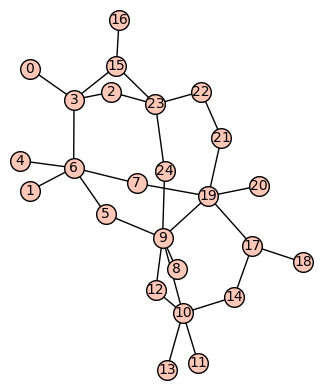

In [2]:
from scipy import signal
import networkx as nx
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Agis.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)
g.to_undirected()

nx.write_edgelist(g, "test.edgelist")
G=nx.read_edgelist("test.edgelist", nodetype=int)
Nodes=G.nodes()
def Convert(tup, di):           #this function converts the edges connected and their weights into dict without displaying the node being considered
    for a, b, c in tup: 
        di.setdefault(b, c+1)
    return di
l=[]
i=0
while i<len(Nodes):             #creates a list of dictionaries that the convert function gives 
    tups = G.edges(i, 'key')
    dictionary = {} 
    l.append(Convert(tups, dictionary))
    i+=1
    
def Convertdict(lst):            # this function converts list l into a dictionary and also puts in the resp. nodes 
    res_dct = {i: lst[i] for i in range(0, len(lst))} 
    return res_dct 
dictf= Convertdict(l)
print(dictf)
S= Sandpile(dictf,1)
S.show()

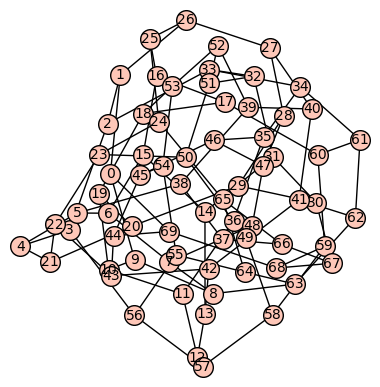

[[           50060796         -2176782336                   0
          71350087680                   0      -1103003827200
                    0      10705435683840                   0
      -73269552844800                   0     376572681925632
                    0   -1511417269013760                   0
     4864392968152320                   0  -12793429938631680
                    0   27882625038704640                   0
   -50895601489922688                   0   78448956854567040
                    0 -102761458293530880                   0
   114968970539395200                   0 -110288378730915360
                    0   90986669101804320                   0
   -64698811647126480                   0   39716563207532400
                    0  -21068427900596460                   0
     9661870055204700                   0   -3829985951018752
                    0    1311351778255620                   0
     -387274004626305                   0      98435565808825
        

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
from scipy import signal
from sage.graphs.distances_all_pairs import shortest_path_all_pairs
from sage.graphs.distances_all_pairs import distances_all_pairs
import networkx as nx
from sage.groups.perm_gps.permgroup_named import SymmetricGroup
pop=0
total=[]
while pop < 1:
    g = graphs.HarriesWongGraph()
    dictf = g
    S= Sandpile(dictf, 0)
    S.show()
#g = dictf
    i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
    l = []#empty list
    b=[]#empty list
    while i > -1:
        S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
        j=0 
        f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
        d = []#empty list to build l, our internal matrix
        n=[]#empty list to build b, our external matrix
        c = S.max_stable() #nice value to have
        while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
            config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
            intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
            one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
            p = c + one #creates the overflowed sandpile by one grain
            o = p.stabilize() # creates the stabilized sandpile
            x=0 # initialize x
            while p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            n.append(x*(sum(list(c.values()))))#adds multiplication of the number of rounds and how much influx there would be to the list
            q = int(sum(o.values())) # sets the value of how much data is saved 
            d.append(q) #add q to the list d
            j+=1# counter
        e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
        cValues = list(c.values()) #creates a list of the max values 
        cValues.insert(i,e[i])# adds the sink to the cvalues
        D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
        D = D.fire_unstable() #fires as if a sandpile
        D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
        afterTwoRounds = D.values() # takes the values of D into a list
        afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
        E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
        x =2 #inititalize, has to be 2 because 2 rounds have went by
        while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
                x+=1
                E = E.fire_unstable()
        T = (x*sum(list(c.values())))# creates the value for the sink source, bassically same as the n.append
        n.insert(i, T)# puts the sink as source into the list n
        d.insert(i, sum(list(c.values())))#adds the diagnol in 
        b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
        l.insert(0,d) #adds the list d to l to create the internal matrix
        i-=1
    A=np.array(l)
    B=np.array(b)
    totalSum = sum(np.sum(A, axis = 1))+sum(np.sum(B, axis = 1))
    tri= list(g.characteristic_polynomial())
    #eval = np.polyval(tri, 1.2)+2870
    #lisss= totalSum,tri
    tri.insert(0,totalSum)
    total.append(tri)
    pop+=1
total = sorted(total)
causeIlikeArrays = np.array(total)
print(causeIlikeArrays)
np.savetxt('2darray.csv', causeIlikeArrays, delimiter=',', fmt='%d')
a = open("2darray.csv", 'r')
print(a.read()) 

In [8]:
#[[204  -1   4   7  -4  -7   0   1]]
#204,-1,4,7,-4,-7,0,1

#[[204  -1   4   7  -4  -7   0   1]]
#204,-1,4,7,-4,-7,0,1


[[           49400520         -2176782336                   0
          71350087680                   0      -1103003827200
                    0      10705435683840                   0
      -73269552844800                   0     376572681925632
                    0   -1511417269013760                   0
     4864392968152320                   0  -12793429938631680
                    0   27882625038704640                   0
   -50895601489922688                   0   78448956854567040
                    0 -102761458293530880                   0
   114968970539395200                   0 -110288378730915360
                    0   90986669101804320                   0
   -64698811647126480                   0   39716563207532400
                    0  -21068427900596460                   0
     9661870055204700                   0   -3829985951018752
                    0    1311351778255620                   0
     -387274004626305                   0      98435565808825
                    0     -21467340180150                   0
        4000027724922                   0       -633214950355
                    0         84524365515                   0
          -9419282820                   0           864628240
                    0           -64183479                   0
              3753855                   0             -166390
                    0                5250                   0
                 -105                   0                   1]]
[[           50060796         -2176782336                   0
          71350087680                   0      -1103003827200
                    0      10705435683840                   0
      -73269552844800                   0     376572681925632
                    0   -1511417269013760                   0
     4864392968152320                   0  -12793429938631680
                    0   27882625038704640                   0
   -50895601489922688                   0   78448956854567040
                    0 -102761458293530880                   0
   114968970539395200                   0 -110288378730915360
                    0   90986669101804320                   0
   -64698811647126480                   0   39716563207532400
                    0  -21068427900596460                   0
     9661870055204700                   0   -3829985951018752
                    0    1311351778255620                   0
     -387274004626305                   0      98435565808825
                    0     -21467340180150                   0
        4000027724922                   0       -633214950355
                    0         84524365515                   0
          -9419282820                   0           864628240
                    0           -64183479                   0
              3753855                   0             -166390
                    0                5250                   0
                 -105                   0                   1]]

SyntaxError: invalid syntax (<ipython-input-8-3e25c8791dd0>, line 8)

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
from scipy import signal
from sage.graphs.distances_all_pairs import shortest_path_all_pairs
from sage.graphs.distances_all_pairs import distances_all_pairs
import networkx as nx
from sage.groups.perm_gps.permgroup_named import SymmetricGroup
pop=0
total=[]
while pop < 20:
    g = graphs.RandomRegular(3,8)
    gg= g.networkx_graph()
    dictf = g
    i=len(g)-1
    l = []
    b=[]
    OD= (2*nx.number_of_edges(gg))-nx.number_of_nodes(gg) #influx per round
    while i > -1:
        S= Sandpile(g, int(i))
        j=0
        f = len(S.nonsink_vertices())
        d = []
        n= []
        c = S.max_stable()
        while j < f:
            intConfig = [int(x) for x in signal.unit_impulse(f,j).tolist()]
            p = c + SandpileConfig(S, intConfig)
            o = p.stabilize()
            x=0
            while p.is_stable()==false:
                x+=1
                p = p.fire_unstable()
            n.append(x*OD)
            d.append(int(sum(o.values()))) #add o.values to the list d
            j+=1
        e= list(S.out_degree().values())
        cValues = list(c.values())
        cValues.insert(i,e[i])
        D = SandpileDivisor(S, cValues)
        D = D.fire_unstable()
        D = D.fire_unstable()
        afterTwoRounds = D.values()
        afterTwoRounds.pop(i)
        E = SandpileConfig(S,afterTwoRounds)
        x =2 
        while E.is_stable()==false:
            x+=1
            E = E.fire_unstable()
        T = (x*OD)
        n.insert(i, T)
        d.insert(i, sum(list(c.values())))#adds the diagnol in 
        b.insert(i - len(g) -1, n)
        l.insert(0,d)
        i-=1
    A=np.array(l)
    B=np.array(b)
    print(A)
    #print(B)
    #adja = g.kirchhoff_matrix()
    #ADJA = np.array(adja)
    #eigvals, eigvecs = LA.eig(ADJA)
    #gEnergy = sum(map(abs,list(eigvals)))*10000000
    totalSum = sum(np.sum(A, axis = 1))#,sum(np.sum(B, axis = 1)),np.trace(A),np.trace(B)
    print(totalSum)
    tri=list(g.characteristic_polynomial(laplacian=True))
    #evalu = np.polyval(tri, 0.1)*10000+288
    lisss= totalSum,tri
    total.append(lisss)
    pop+=1
#total = sorted(total)
causeIlikeArrays = np.array(total)
#print(causeIlikeArrays)
np.savetxt('2darray.csv', causeIlikeArrays, delimiter=',', fmt='%d')
a = open("2darray.csv", 'r')
print(a.read()) 

[[14 12  9 12  9  9  9 12]
 [12 14  9  9 12  9 12  9]
 [ 9  9 14 12 12 12  9  9]
 [12  9 12 14  9  9 12  9]
 [ 9 12 12  9 14  9  9 12]
 [ 9  9 12  9  9 14 12 12]
 [ 9 12  9 12  9 12 14  9]
 [12  9  9  9 12 12  9 14]]
688
[[14 12 11 12 11 11 11 12]
 [12 14 12 11 12 11 11 11]
 [11 12 14  9 12 12 11  9]
 [12 11  9 14  9 11 12 12]
 [11 12 12  9 14 11 12  9]
 [ 9  9 12  9  9 14 12 12]
 [ 9  9  9 12 12 12 14  9]
 [12 11  9 12  9 12 11 14]]
720
[[14 12 11 11 12 11 12 11]
 [12 14  9  9 12 12 12 12]
 [12  9 14 12  9 12 12 12]
 [12  9 12 14  9 12 12 12]
 [12 12  9  9 14 12 12 12]
 [11 11 12 12 11 14 11 12]
 [12 11 12 12 11 11 14 11]
 [11 12 11 11 12 12 11 14]]
744
[[14  9  9 12 12  9 12  9]
 [11 14 12 11 11 12 12 11]
 [11 12 14 11 11 11 12 12]
 [12 12 12 14 12 12 12 12]
 [12 12 12 12 14 12 12 12]
 [ 9 12  9 12 12 14  9  9]
 [12 12 12 11 11 11 14 11]
 [ 9  9 12 12 12  9  9 14]]
736
[[14 12 11 12 12 11 11 11]
 [12 14 11 11 11 12 12 11]
 [11 11 14 11 11 12 12 12]
 [12 12 12 14 12  9  9 12]
 [12 12 

TypeError: Mismatch between array dtype ('object') and format specifier ('%d,%d')

In [52]:
[[12  9  9 11 11 11  9]
 [ 9 12 11 11  9  9  9]
 [ 7  7 10  7  7  7  7]
 [ 7  7  7 10  6  7  6]
 [ 7  6  7  6 10  7  7]
 [11  9  9 11 11 12  9]
 [ 9  9 11  9 11  9 12]]
[[ 13 104  91  39  39  39 104]
 [117  13  39  39  91 117 104]
 [ 39  65  13  52  52  39  65]
 [ 52  52  39  13  65  52  78]
 [ 52  78  39  65  13  52  52]
 [ 39 104  91  39  39  13 104]
 [117 104  39  91  39 117  13]]
[[(436, 2925, 78, 91) 0 -8 4 17 -4 -10 0 1]]
Graph({0:[4,3],1:[2,3],2:[1,3,4,6],3:[0,1,2,5],4:[0,5,6,2],5:[3,4],6:[2,4]})


[[12  9  9 11 11  9  9]
 [ 8 12 11 11  8  8  8]
 [ 9  9 11  9  9  7  7]
 [ 5  5  5  9  5  5  5]
 [ 9  7  9  7 11  9  7]
 [ 9  7  7  9  9 11  9]
 [ 8  8  8 11  8 11 12]]
[[ 13 104 117  39  39 117 104]
 [156  13  39  39 130 143 156]
 [ 39  52  13  39  52 117 104]
 [ 52  65  52  13  39  52  65]
 [ 39  78  39  65  13  39  78]
 [ 39 104 117  39  52  13  52]
 [156 156 143  39 130  39  13]]
[[(422, 3406, 78, 91) 0 -8 4 17 -4 -10 0 1]]
{0:[4,3],1:[2,3],2:[1,3,4],3:[0,1,2,5,6],4:[0,5,2],5:[3,4,6],6:[5,3]})



[[14 13 13  9  9  9  9]
 [ 9 12  9  9  9  9  9]
 [ 7  7 11  7  7  7  7]
 [11 11 11 13 11 11 11]
 [10 10 13 10 14 13 10]
 [ 8  8  9 11 11 13 11]
 [11 11 11 11 11 11 13]]
[[ 60  45  45 210 195 150 210]
 [ 60  45  45  45  60  60  45]
 [ 75  60  45  45  75  60  45]
 [ 60  45  45  45  45  60  45]
 [165 150  45 150  45  60 150]
 [120 135  75  45  45  60  45]
 [ 60  45  45  45  45  60  45]]
[[(504, 3660, 90, 345) 0 -2 6 14 -6 -11 0 1]]
{0:[1,2],1:[2,3,6,0],2:[0,1,3,4,6],3:[1,2,5],4:[5,2],5:[3,4,6],6:[1,2,5]}


[[14 13 13 11 11 11 11]
 [ 9 12  9  9  9  9  9]
 [ 9  9 12  9  9  9  9]
 [ 9  9  9 12  9  9  9]
 [ 9  9 11  9 13 11 11]
 [ 9  9 10 13 13 14 10]
 [ 8 11  8 11 11 11 13]]
[[ 60  45  45 135 135 120 120]
 [ 60  45  45  45  60  60  60]
 [ 60  45  45  45  60  60  45]
 [ 60  60  45  45  45  60  45]
 [105 105  45  75  45  60  45]
 [180 195 150  45  45  60 150]
 [135  45 150  45  45  60  45]]
[[(506, 3585, 90, 345) 0 -4 6 17 -6 -11 0 1]]
{0:[1,2],1:[2,3,6,0],2:[0,1,3,4],3:[1,2,5,6],4:[5,2,6],5:[3,4],6:[1,3,4]}

SyntaxError: invalid syntax (<ipython-input-52-774fe4850f50>, line 1)

In [ ]:
[[14 12 11 12 12 11 11 11]
 [12 14 11 11 11 12 12 11]
 [11 11 14 11 11 12 12 12]
 [12 12 12 14 12  9  9 12]
 [12 12 12 12 14  9  9 12]
 [12 12 12  9  9 14 12 12]
 [12 12 12  9  9 12 14 12]
 [11 11 12 12 12 11 11 14]]
744
[[14 12  9 12 12 12 12  9]
 [12 14 11 11 12 12 11 11]
 [ 9 12 14 12 12  9 12 12]
 [11 11 12 14 11 11 12 12]
 [11 12 12 11 14 11 11 12]
 [12 12  9 12 12 14 12  9]
 [12 11 11 12 11 12 14 11]
 [ 9 12 12 12 12  9 12 14]]
744

[[14  9 12 11 12  9 12 11]
 [ 9 14 12 11 11 12  9 12]
 [12 12 14 12  9  9  9  9]
 [ 9  9 12 14  9 12 12  9]
 [12 11 11 11 14 11 12 12]
 [ 9 12 11 12 11 14  9 12]
 [12  9 11 12 12  9 14 11]
 [11 12 11 11 12 12 11 14]]
720
[[14  9 12 12  9  9  9 12]
 [11 14 12  9 11 12  9 12]
 [12 12 14  9  9  9 12  9]
 [12  9 11 14 12 11 12  9]
 [11 11 11 12 14 12 12 11]
 [11 12 11 11 12 14 11 12]
 [11  9 12 12 12 11 14  9]
 [12 12 11  9 11 12  9 14]]
720


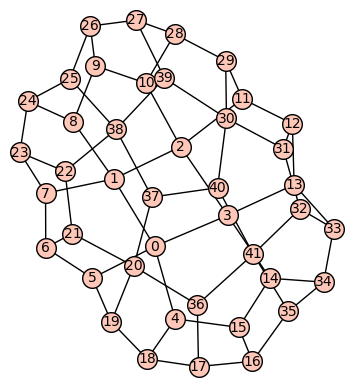

7361104
4333889459128304.5


Text(0.5,1,'Image plot of sink vertex vs. source vertex for a grid of data saved values')

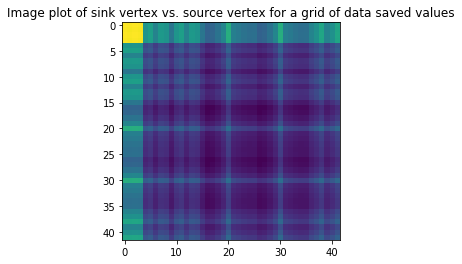

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
from scipy import signal
from sage.graphs.distances_all_pairs import shortest_path_all_pairs
from sage.graphs.distances_all_pairs import distances_all_pairs
import networkx as nx
from sage.groups.perm_gps.permgroup_named import SymmetricGroup
#g = nx.read_graphml('C:/Users/Bhavana/Desktop/altREU/Airtel.graphml')
g = graphs.WienerArayaGraph()

gg= g.networkx_graph()# if you enable these two commands, make sure to replace 4 by 2 in OD
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL

i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
OD= (2*nx.number_of_edges(gg))-nx.number_of_nodes(gg) #influx per round
while i > -1:
    S= Sandpile(g, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0 
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        TT = 0
        x=0 # initialize x
        while TT<0:
            p = p+one+one
            if p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            TT+=1
        y=0
        while p.is_stable()==false:
            y+=1
            p = p.fire_unstable()
        n.append((x+y)*OD)#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*OD)# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
S = Sandpile(g,1)
S.show()
T = np.array(b)
totalSum = sum(np.sum(T, axis = 1))
print(totalSum)
#print(g.spectrum())
R = np.array(S.reduced_laplacian())
print(np.linalg.det(R))
G = g.katz_matrix(1/3.2647667)
A=np.array(g.laplacian_matrix())
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin) #normalizes values
B=np.array(G)
#B= B.max()-B
Bmax, Bmin = B.max(), B.min()
B = (B - Bmin)/(Bmax - Bmin) #normalizes values
plt.imshow(B);
print(A)
plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")

In [7]:
katz 3.2647667

NameError: name 'incidence_matrix' is not defined

Graph in GraphML (Enter with File Path): /Users/monroestephenson/Desktop/archive/Agis.graphml


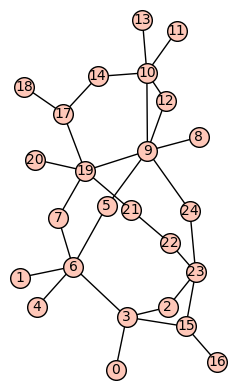

<Figure size 640x480 with 2 Axes>

Most Vulnerable Server:  16
Feasible Sink for any Source:  12
Identified the source of attack? (Y/N)Y
Enter Source Server: 9
Blackhole  8


In [1]:
import os.path
import sys
inp= input("Graph in GraphML (Enter with File Path): ")
if os.path.isfile(inp):
    graph= inp
else:
    sys.exit("File does not exist")
    
from scipy import signal
import networkx as nx
import numpy as np
from sage.graphs.graph_input import from_dict_of_dicts
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import linalg as LA
g = nx.read_graphml(graph)
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)


nx.write_edgelist(g, "test.edgelist")
G=nx.read_edgelist("test.edgelist", nodetype=int)
Nodes=G.nodes()
G.to_directed()
def Convert(tup, di):           #this function converts the edges connected and their weights into dict without displaying node being considered
    for a, b, c in tup: 
        di.setdefault(b, c+1)
    return di
SS=[]
l=[]
i=0
while i<len(Nodes):             #creates a list of dictionaries that the convert function gives 
    tups = G.edges(i, 'key')
    dictionary = {} 
    l.append(Convert(tups, dictionary))
    for x in Convert(tups, dictionary):
        SS.append(Convert(tups, dictionary)[x])
    i+=1
#print(l)
#def Convertdict(lst):            # this function converts that list into a dictionary by putting in the resp nodes 
    #res_dct = {i: lst[i] for i in range(0, len(lst))} 
    #return res_dct
def Convertdict(lst, dct):            # this function converts that list into a dictionary by putting in the resp nodes 
    for i in range(0, len(lst)):
        dct.setdefault(i, lst[i])
    return dct
dictt={}
dictf= Convertdict(l, dictt)
#print(dictf)
#print(len(Nodes))
#print(S)

OD=sum(SS)-len(Nodes)
g=dictf

i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
while i > -1:
    S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0 
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        TT = 0
        x=0 # initialize x
        while TT<500:
            p = p+one+one
            if p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            TT+=1
        y=0
        while p.is_stable()==false:
            y+=1
            p = p.fire_unstable()
        n.append((x+y)*OD)#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*OD)# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
S = Sandpile(g,1)
S.show()

def showim(matrix):
        plt.imshow(matrix); plt.colorbar()
        plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
        plt.show()
        

A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin)

B=np.array(b)
Bmin, Bmax = B.max(), B.min()
B = (B - Bmin)/(Bmax - Bmin) #normalizes values
C=A+B
Cmin, Cmax = C.min(), C.max()
C = (C- Cmin)/(Cmax - Cmin) #normalizes values
showim(C)


rowsum= np.sum(C, axis = 0)
columnsum= np.sum(C, axis = 1)
i= np.argmin(rowsum, axis=0)
print("Most Vulnerable Server: ",  i)
j= np.argmax(columnsum, axis=0)
print("Feasible Sink for any Source: ", j)

inp= input("Identified the source of attack? (Y/N)")
if inp == "Y":
    nodeno= int(input("Enter Source Server: "))
    if nodeno<len(Nodes):
        bh= np.argmax(C[:,nodeno], axis=0)
        print("Blackhole ", bh)
else:
    print("Blackhole ", j)









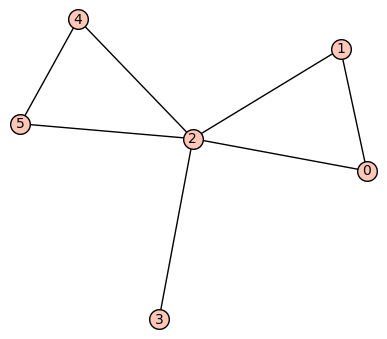

[-1, 4, 7, -4, -7, 0, 1]
Trace of normalized values= 595


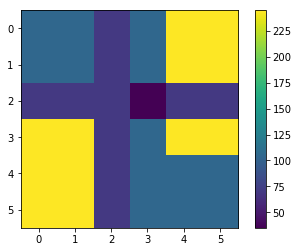

In [6]:
from scipy import signal
import networkx as nx
import numpy as np
from sage.graphs.graph_input import from_dict_of_dicts
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy import linalg as LA
from scipy import signal
from sage.graphs.distances_all_pairs import shortest_path_all_pairs
from sage.graphs.distances_all_pairs import distances_all_pairs
import networkx as nx
from sage.groups.perm_gps.permgroup_named import SymmetricGroup
g = nx.read_graphml('/Users/monroestephenson/Desktop/archive/Agis.graphml')
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)


nx.write_edgelist(g, "test.edgelist")
G=nx.read_edgelist("test.edgelist", nodetype=int)
Nodes=G.nodes()
G.to_directed()
def Convert(tup, di):           #this function converts the edges connected and their weights into dict without displaying node being considered
    for a, b, c in tup: 
        di.setdefault(b, c+1)
    return di
SS=[]
l=[]
i=0
while i<len(Nodes):             #creates a list of dictionaries that the convert function gives 
    tups = G.edges(i, 'key')
    dictionary = {} 
    l.append(Convert(tups, dictionary))
    for x in Convert(tups, dictionary):
        SS.append(Convert(tups, dictionary)[x])
    i+=1
#print(l)
#def Convertdict(lst):            # this function converts that list into a dictionary by putting in the resp nodes 
    #res_dct = {i: lst[i] for i in range(0, len(lst))} 
    #return res_dct
def Convertdict(lst, dct):            # this function converts that list into a dictionary by putting in the resp nodes 
    for i in range(0, len(lst)):
        dct.setdefault(i, lst[i])
    return dct
dictt={}
dictf= Convertdict(l, dictt)
#print(dictf)
#print(len(Nodes))
#print(S)
dictf = Graph({0:[1,2],1:[2,0],2:[1,3,4,0,5],3:[2],4:[2,5],5:[4]})
OD=sum(SS)-len(Nodes)
g=dictf

i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
while i > -1:
    S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        TT = 0
        x=0 # initialize x
        while TT<0:
            p = p+one+one
            if p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            TT+=1
        y=0
        while p.is_stable()==false:
            y+=1
            p = p.fire_unstable()
        n.append((x+y)*OD)#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*OD)# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
S = Sandpile(g,1)
S.show()
A=np.array(l)
B=np.array(b)
tri= list(g.characteristic_polynomial())
print(tri)
plt.imshow(A); plt.colorbar()
print('Trace of normalized values= ' + str(np.trace(B)))

In [8]:
import os.path
import sys
inp= input("Graph in GraphML (Enter with File Path): ")
if os.path.isfile(inp):
    graph= inp
else:
    sys.exit("File does not exist")
    
from scipy import signal
import networkx as nx
import numpy as np
from sage.graphs.graph_input import from_dict_of_dicts
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import linalg as LA
g = nx.read_graphml(graph)
#USE GRAPHML FILES, YOU CAN USE GML BUT DOESNT WORK AS WELL
nx.to_networkx_graph(g)


nx.write_edgelist(g, "test.edgelist")
G=nx.read_edgelist("test.edgelist", nodetype=int)
Nodes=G.nodes()
G.to_directed()
def Convert(tup, di):           #this function converts the edges connected and their weights into dict without displaying node being considered
    for a, b, c in tup: 
        di.setdefault(b, c+1)
    return di
SS=[]
l=[]
i=0
while i<len(Nodes):             #creates a list of dictionaries that the convert function gives 
    tups = G.edges(i, 'key')
    dictionary = {} 
    l.append(Convert(tups, dictionary))
    for x in Convert(tups, dictionary):
        SS.append(Convert(tups, dictionary)[x])
    i+=1
#print(l)
#def Convertdict(lst):            # this function converts that list into a dictionary by putting in the resp nodes 
    #res_dct = {i: lst[i] for i in range(0, len(lst))} 
    #return res_dct
def Convertdict(lst, dct):            # this function converts that list into a dictionary by putting in the resp nodes 
    for i in range(0, len(lst)):
        dct.setdefault(i, lst[i])
    return dct
dictt={}
dictf= Convertdict(l, dictt)
#print(dictf)
#print(len(Nodes))
#print(S)

OD=sum(SS)-len(Nodes)
g=dictf

DYF=input("Do you know the packet rate of your attack? (Y/N): ")
if DYF == "Y":
    freq = float(input("Enter packet rate (in Mpps): "))
    print("Program assumes duration of attack to be 3600s...")
    tt=freq*3600 #attack assumed to last 1 hour
else:
    print("Program assumes a packet rate of 1 Mpps...")
    tt=3600

i=len(g)-1# this is a backwards while loop, so starts at highest index, ie the -1, then goes to zero
l = []#empty list
b=[]#empty list
while i > -1:
    S= Sandpile(dictf, int(i))#sets the sandpile to the given graph dictf and has i as the sink
    j=0 
    f = len(S.nonsink_vertices()) # going to use this for a while loop and for a kronecker delta function so set 
    d = []#empty list to build l, our internal matrix
    n=[]#empty list to build b, our external matrix
    c = S.max_stable() #nice value to have
    while j < f: #goes through all the non-sink vertexs, cause the sink cant be the source on Sage, so we have some ways to get around that
        config = signal.unit_impulse(f,j).tolist()# this takes in f and compares to j, and if they are equal it will =1, otherwise 0. this is a kronecker delta basically. So we will have a list with one value in it, the source
        intConfig = [int(x) for x in config]# config has all floats and Sage doesnt like floats, so converts to int
        one = SandpileConfig(S, intConfig)# creates the sandpile with one grain
        p = c + one #creates the overflowed sandpile by one grain
        o = p.stabilize() # creates the stabilized sandpile
        TT = 0
        x=0 # initialize x
        while TT<500:
            p = p+one+one
            if p.is_stable()==false:# this while loop stabilzes our config, and counts how many times it fires to stabilze
                x+=1 #counter
                p = p.fire_unstable() # stabilzer
            TT+=1
        y=0
        while p.is_stable()==false:
            y+=1
            p = p.fire_unstable()
        n.append((x+y)*OD)#adds multiplication of the number of rounds and how much influx there would be to the list
        q = int(sum(o.values())) # sets the value of how much data is saved 
        d.append(q) #add q to the list d
        j+=1# counter
    
    e= list(S.out_degree().values())# creates a list of the outdegree values, basically the influx
    cValues = list(c.values()) #creates a list of the max values 
    cValues.insert(i,e[i])# adds the sink to the cvalues
    D = SandpileDivisor(S, cValues)#creates a Divisor, so there is no sink
    D = D.fire_unstable() #fires as if a sandpile
    D = D.fire_unstable() #fires another, so assuming 2 rounds of instability before people notice 
    afterTwoRounds = D.values() # takes the values of D into a list
    afterTwoRounds.pop(i) #takes off the sink so that it can be a sandpile
    E = SandpileConfig(S,afterTwoRounds) # creates the new sandpile, where the sink is the source and 2 rounds have went by, we can then determine how long the sink will take
    x =2 #inititalize, has to be 2 because 2 rounds have went by
    while E.is_stable()==false:# stabilzes E and counts how many rounds it takes 
            x+=1
            E = E.fire_unstable()
    T = (x*OD)# creates the value for the sink source, bassically same as the n.append
    n.insert(i, T)# puts the sink as source into the list n
    d.insert(i, sum(list(c.values())))#adds the diagnol in 
    b.insert(i - len(g) -1, n) # adds the list n to b to create b the external matrix
    l.insert(0,d) #adds the list d to l to create the internal matrix
    i-=1
S = Sandpile(g,1)
S.show()

def showim(matrix):
        plt.imshow(matrix); plt.colorbar()
        plt.title("Image plot of sink vertex vs. source vertex for a grid of data saved values")
        plt.show()
        

A=np.array(l)
Amax, Amin = A.max(), A.min()
A = (A - Amin)/(Amax - Amin)

B=np.array(b)
Bmin, Bmax = B.max(), B.min()
B = (B - Bmin)/(Bmax - Bmin) #normalizes values
C=A+B
Cmin, Cmax = C.min(), C.max()
C = (C- Cmin)/(Cmax - Cmin) #normalizes values
showim(C)


rowsum= np.sum(C, axis = 0)
columnsum= np.sum(C, axis = 1)
i= np.argmin(rowsum, axis=0)
print("Most Vulnerable Server: ",  i)
j= np.argmax(columnsum, axis=0)
print("Feasible Sink for any Source: ", j)

inp= input("Identified the source of attack? (Y/N)")
if inp == "Y":
    nodeno= int(input("Enter Source Server: "))
    if nodeno<len(Nodes):
        bh= np.argmax(C[:,nodeno], axis=0)
        print("Blackhole ", bh)
else:
    print("Program suggests feasible sink")
    print("Blackhole ", j)

Graph in GraphML (Enter with File Path): /Users/monroestephenson/Desktop/archive/Aarrrr.graphml


ParseError: not well-formed (invalid token): line 15, column 2 (<string>)

In [7]:
g = graphs.StarGraph(23)
StarGraph = tmp_filename(ext=".edgelist")
g.export_to_file(StarGraph, format = graphml)

NameError: name 'graphml' is not defined